<a href="https://colab.research.google.com/github/SofiMich/CE/blob/main/T3/T3_CE_Michaelian_2_nReinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. nReinas
El problema de las nReinas consiste en encontrar la solución al problema de acomodar n reinas en un tablero de ajedrez de manera que no se ataquen entre ellas. 

In [ ]:
import numpy as np
import pandas as pd
import math
import random

##1.1 Codificación binaria
Para la codificación binaria tenemos varias opciones, la primera es representar el tablero como un arreglo de 1s y 0s, en el que la posición del 1 representa la posición de la reina en cada reglón. Hay una regunda opción de represesntación que es mucho más efectiva: representar el tablero como una cadena de números binarios en la que el número en la n-ésima entrada del vector representa la columna en la que se encuentra la n-ésima reina. Usaremos esta segunda representación:

*   Para n = 8 necesitamos 3 dígitos para la posición de cada reina, por lo que tendremos un vector de 24 entradas binarias.
*   Para n = 10 necesitamos 4 dígitos, un vector de 40 entradas.



In [ ]:
def pobBin(nInd = 60, n = 8, d = 3):
  pob = np.random.randint(0,2,(nInd,d*n)) #población inicial  
  return pob

In [ ]:
pobB = pobBin(60)
pobB

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 1, 0]])

In [ ]:
def codifBin(individuo, n = 8, d=3):
  x = []
  for i in range(n):
    x.append(individuo[i*d:(i+1)*d].dot(2**np.arange(individuo[i*d:(i+1)*d].size)[::-1])%n)
  return np.array(x)

In [ ]:
pobB = pobBin(60)
x = codifBin(pobB[0])
print(x)

[7 4 6 4 2 2 2 1]


Como podemos observar, con esta codificación tenemos lgunas columnas repetidas, lo cual es indeseable en nuestra solución. Tenemos dos opciones para evitar esto: 
1. Penalizar a los individuos que tienen ciudades repetidas al momento de hacer la evaluación.
2. "Purgar" a cada individuo sustituyendo los valores repetidos por aquellos que no se encuentran en el genotipo.
La primer estrategia es la más fácil de implemtentar y es la que usaré, ya que la segunda, además de tomar más tiempo de cómputo, requiere de un paso de volver a codificar en binario.

In [ ]:
# def purgar(individuo):
#   # Obtener los valores únicos y las veces que se repiten
#     unq,c = np.unique(individuo,return_counts=1)
#     print(c-1)

#     # Generamos una máscara de coincidencias entre el idividuo y los genes que se repiten
#     m = np.isin(individuo,unq[c>1])

#     # Obtenemos los valores que hacen falta en el arreglo original
#     newvals = np.setdiff1d(np.arange(len(individuo)),individuo[~m])
#     np.random.shuffle(newvals)

#     # Asignamos los valores que faltan a las entradas que están duplicadas
#     individuo[m] = newvals
#     return individuo

##1.2 Codificación entera
Para la codificación entera representaremos cada ciudad como un número entre 0 y 16, y cada individuo entonces será una permutación de esos 17 números. 

Generamos nuestra población inicial:

In [ ]:
def pobEnt(nInd = 60, n = 8, d = 1):

  pob = np.zeros((nInd,n), dtype=int)
  for i in range(nInd):
    pob[i] = np.random.permutation(n) 

  return pob

In [ ]:
def codifEnt(individuo, n = 8, d=1):
  return individuo

In [ ]:
pobE = pobEnt(60)

In [ ]:
pobE

array([[5, 2, 1, 4, 7, 0, 3, 6],
       [4, 2, 0, 6, 5, 1, 7, 3],
       [3, 4, 1, 6, 2, 0, 7, 5],
       [6, 2, 7, 1, 5, 0, 4, 3],
       [5, 0, 2, 6, 1, 3, 7, 4],
       [0, 3, 2, 5, 1, 7, 4, 6],
       [4, 1, 2, 3, 7, 6, 5, 0],
       [7, 2, 6, 4, 0, 1, 5, 3],
       [4, 7, 5, 3, 0, 1, 6, 2],
       [5, 7, 1, 0, 4, 6, 3, 2],
       [0, 5, 4, 7, 3, 1, 6, 2],
       [0, 3, 4, 5, 2, 7, 6, 1],
       [1, 3, 0, 4, 2, 5, 7, 6],
       [1, 5, 4, 7, 6, 0, 2, 3],
       [6, 1, 4, 0, 3, 7, 5, 2],
       [4, 3, 6, 1, 5, 0, 2, 7],
       [5, 0, 6, 1, 7, 3, 4, 2],
       [3, 7, 2, 1, 4, 5, 0, 6],
       [3, 4, 0, 7, 2, 5, 1, 6],
       [1, 7, 4, 2, 0, 3, 6, 5],
       [2, 7, 6, 5, 3, 1, 4, 0],
       [0, 1, 4, 5, 6, 2, 3, 7],
       [2, 4, 6, 7, 5, 1, 3, 0],
       [3, 7, 1, 2, 4, 0, 5, 6],
       [3, 2, 7, 5, 1, 4, 6, 0],
       [1, 3, 2, 7, 4, 5, 0, 6],
       [5, 1, 7, 2, 4, 6, 3, 0],
       [5, 4, 6, 1, 7, 0, 3, 2],
       [1, 2, 4, 5, 3, 0, 7, 6],
       [2, 3, 4, 7, 6, 5, 0, 1],
       [1,

##1.2 Codificación real
Para la codificación real

## Evaluar la población
Al evaluar la población tendremos que fijarmos en que las reinas no se ataquen entre sí. Con la codificación que tenemos, ya hemos asegurado que no haya dos reinas en el mismo renglón.

### Codificación entera
 y para la codificación entera también aseguramos que no haya dos reinas en la misma columna, ya que estamos usando permutaciones sin repetición, por lo tanto, para esta codificación solo queda checar los posibles ataques en diagonal.

Para checar si la reina en la posición $(i,j)$ puede atacar a alguna otra, tenemos que checar si hay reinas en las posiciones $(i,j) \pm (k,k)$, con $k$ un entero entre $1$ y $n-j$.

In [ ]:
def evaluar(pob, codif):
  ataques = []

  for individuo in pob:
    individuo = codif(individuo)
    ataque = 0.0

    for i in range(individuo.size):
      for j in range(i+1, individuo.size):
        #print(i,j)
        if individuo[i] == individuo[j]:
          ataque+=1.0

        if abs(i-j)==abs(individuo[i]-individuo[j]):
          ataque+=1.0
                    #print(f'Ataques hasta ahora:{ataque}')

    # Penalización por ciudades repetidas
    unq,c = np.unique(individuo,return_counts=1)
    ataque = ataque + np.sum(c-1)

    individuo = np.append(individuo.astype(int), ataque)
    ataques.append(individuo)

  return np.array(ataques)

In [ ]:
pobEvaluada = evaluar(pobE,codifEnt)
pobEvaluada

array([[ 5.,  2.,  1.,  4.,  7.,  0.,  3.,  6.,  4.],
       [ 4.,  2.,  0.,  6.,  5.,  1.,  7.,  3.,  5.],
       [ 3.,  4.,  1.,  6.,  2.,  0.,  7.,  5.,  6.],
       [ 6.,  2.,  7.,  1.,  5.,  0.,  4.,  3.,  4.],
       [ 5.,  0.,  2.,  6.,  1.,  3.,  7.,  4.,  2.],
       [ 0.,  3.,  2.,  5.,  1.,  7.,  4.,  6.,  5.],
       [ 4.,  1.,  2.,  3.,  7.,  6.,  5.,  0.,  7.],
       [ 7.,  2.,  6.,  4.,  0.,  1.,  5.,  3.,  5.],
       [ 4.,  7.,  5.,  3.,  0.,  1.,  6.,  2.,  4.],
       [ 5.,  7.,  1.,  0.,  4.,  6.,  3.,  2.,  4.],
       [ 0.,  5.,  4.,  7.,  3.,  1.,  6.,  2.,  5.],
       [ 0.,  3.,  4.,  5.,  2.,  7.,  6.,  1., 10.],
       [ 1.,  3.,  0.,  4.,  2.,  5.,  7.,  6.,  5.],
       [ 1.,  5.,  4.,  7.,  6.,  0.,  2.,  3.,  7.],
       [ 6.,  1.,  4.,  0.,  3.,  7.,  5.,  2.,  3.],
       [ 4.,  3.,  6.,  1.,  5.,  0.,  2.,  7.,  5.],
       [ 5.,  0.,  6.,  1.,  7.,  3.,  4.,  2.,  4.],
       [ 3.,  7.,  2.,  1.,  4.,  5.,  0.,  6.,  5.],
       [ 3.,  4.,  0.,  7., 

In [ ]:
evaluar(pobE,codifEnt)[:,-1]

array([ 4.,  5.,  6.,  4.,  2.,  5.,  7.,  5.,  4.,  4.,  5., 10.,  5.,
        7.,  3.,  5.,  4.,  5.,  3.,  3.,  5.,  7.,  2.,  9.,  2.,  5.,
        4.,  6.,  6., 11.,  6., 11.,  7.,  4., 11.,  2., 10.,  7.,  4.,
        9.,  6.,  6.,  4.,  6.,  6., 10.,  3., 11.,  5.,  3.,  7.,  5.,
        3., 10.,  4.,  6.,  4.,  6.,  4.,  1.])

In [ ]:
np.where(evaluar(pobE,codifEnt)[:,-1] < 3)

(array([ 4, 22, 24, 35, 59]),)

In [ ]:
np.unique(evaluar(pobE,codifEnt)[np.where(evaluar(pobE,codifEnt)[:,-1] == 0)], axis = 0)

array([], shape=(0, 9), dtype=float64)

### Calcular Fitness

In [ ]:
def calcularFitness(pob):
  total = np.sum(pob, axis = 0)[-1]
  #print(total)

  for i in pob:
    #print(i[-1])
    i[-1] = np.abs(1 - i[-1]/(total + np.nextafter(0,1)))

  return pob

In [ ]:
pobEvaluada = calcularFitness(pobEvaluada)
pobEvaluada

array([[5.        , 2.        , 1.        , 4.        , 7.        ,
        0.        , 3.        , 6.        , 0.98802395],
       [4.        , 2.        , 0.        , 6.        , 5.        ,
        1.        , 7.        , 3.        , 0.98502994],
       [3.        , 4.        , 1.        , 6.        , 2.        ,
        0.        , 7.        , 5.        , 0.98203593],
       [6.        , 2.        , 7.        , 1.        , 5.        ,
        0.        , 4.        , 3.        , 0.98802395],
       [5.        , 0.        , 2.        , 6.        , 1.        ,
        3.        , 7.        , 4.        , 0.99401198],
       [0.        , 3.        , 2.        , 5.        , 1.        ,
        7.        , 4.        , 6.        , 0.98502994],
       [4.        , 1.        , 2.        , 3.        , 7.        ,
        6.        , 5.        , 0.        , 0.97904192],
       [7.        , 2.        , 6.        , 4.        , 0.        ,
        1.        , 5.        , 3.        , 0.98502994],


### Calcular probabilidad de selección

In [ ]:
def calcularPS(x):
  total = np.sum(x, axis = 0)[-1]
  
  for i in x:
    if i[-1]/total >= 0:
        i[-1] = i[-1]/total
    else:
        print('Probabilidad negativa!!!')
        print(i)
        i[-1] = np.nextafter(0,1)
  return x

In [ ]:
pobEvaluada = calcularPS(pobEvaluada)
print(np.sum(pobEvaluada[:,-1], axis = 0) )#para checar que la suma de las probabilidades sí den 1
#print(pobEvaluada)


1.0000000000000007


### Seleccionar individuos para el pool de cruza

In [ ]:
def seleccionar(x,pob):
  pool = []
  for i in range(len(pob)):
    r = np.random.choice(range(len(pob)), p=x[:,-1])

    pool.append(pob[r])
  
  pool = np.array(pool)

  return pool

In [ ]:
pool = seleccionar(pobEvaluada,pobE)
pool

array([[5, 7, 1, 0, 4, 6, 3, 2],
       [7, 4, 6, 0, 1, 2, 5, 3],
       [1, 7, 4, 2, 0, 3, 6, 5],
       [5, 4, 6, 1, 7, 0, 3, 2],
       [5, 4, 7, 2, 6, 3, 0, 1],
       [7, 0, 4, 5, 3, 1, 6, 2],
       [1, 2, 4, 5, 3, 0, 7, 6],
       [3, 7, 1, 2, 4, 0, 5, 6],
       [2, 3, 4, 7, 6, 5, 0, 1],
       [0, 3, 4, 5, 2, 7, 6, 1],
       [0, 1, 7, 3, 4, 2, 6, 5],
       [0, 3, 2, 5, 1, 7, 4, 6],
       [1, 2, 4, 5, 3, 0, 7, 6],
       [7, 6, 4, 0, 3, 2, 1, 5],
       [1, 3, 0, 4, 2, 5, 7, 6],
       [0, 4, 5, 3, 7, 1, 6, 2],
       [5, 7, 1, 0, 4, 6, 3, 2],
       [7, 0, 4, 5, 3, 1, 6, 2],
       [7, 2, 6, 4, 0, 1, 5, 3],
       [3, 0, 5, 2, 1, 6, 7, 4],
       [5, 1, 7, 2, 4, 6, 3, 0],
       [5, 1, 6, 7, 4, 2, 0, 3],
       [0, 6, 5, 4, 7, 2, 1, 3],
       [6, 4, 0, 3, 1, 7, 5, 2],
       [6, 7, 3, 4, 2, 5, 0, 1],
       [7, 6, 4, 5, 3, 1, 2, 0],
       [7, 6, 4, 1, 3, 5, 2, 0],
       [1, 5, 4, 7, 6, 0, 2, 3],
       [3, 6, 2, 0, 7, 4, 1, 5],
       [7, 5, 0, 3, 2, 6, 4, 1],
       [3,

### Cruza

Cruza en la codifcación entera:

In [ ]:
def cruzaEnt(pool, pc):
  nuevaGen = np.zeros((len(pool),len(pool[1])))

  l = len(pool[1])

  for i in range(len(pool)//2):
    hijo1 = -np.ones(l)
    hijo2 = -np.ones(l)
    
    padre1 = pool[2*i]
    padre2 = pool[2*i+1]
    r = random.uniform(0,1)

    if r <= pc:

      n1 = random.randint(0,l)
      n2 = random.randint(0,l)
      cruce1 = min(n1,n2)
      cruce2 = max(n1,n2)
      
     
      hijo1[cruce1:cruce2] = padre1[cruce1:cruce2]

      res2 = [item for item in padre2 if item not in hijo1]
     
      hijo1[0:cruce1] = res2[0:cruce1]
      
      hijo1[cruce2:] = res2[cruce1:]
      
      hijo2[cruce1:cruce2] = padre2[cruce1:cruce2]
      res1 = [item for item in padre1 if item not in hijo2]

      hijo2[0:cruce1] = res1[0:cruce1]
      hijo2[cruce2:] = res1[cruce1:]
    
    else:
      hijo1 = padre1
      hijo2 = padre2

    nuevaGen[2*i] = hijo1
    nuevaGen[2*i+1] = hijo2

  return np.array(nuevaGen)
    

Cruza en la codificación Binaria:

In [ ]:
def cruzaBin(pool,pc=1):
  nuevaGen = np.zeros((len(pool),len(pool[1])))

  l = len(pool[1])

  hijo1 = np.zeros(l)
  hijo2 = np.zeros(l)

  for i in range(len(pool)//2):
    padre1 = pool[2*i]
    padre2 = pool[2*i+1]
    r = random.uniform(0,1)

    if r <= pc:

      cruce = random.randint(0,l)
      #print(cruce)

      hijo1[0:cruce] = padre1[0:cruce]
      hijo1[cruce:l] = padre2[cruce:l]

      hijo2[0:cruce] = padre2[0:cruce]
      hijo2[cruce:l] = padre1[cruce:l]
    
    else:
      hijo1 = padre1
      hijo2 = padre2

    nuevaGen[2*i] = hijo1
    nuevaGen[2*i+1] = hijo2

  return np.array(nuevaGen)

In [ ]:
nuevaGen = cruzaEnt(pool,1)
nuevaGen

array([[7., 2., 1., 0., 4., 6., 3., 5.],
       [7., 4., 6., 0., 1., 2., 5., 3.],
       [5., 6., 4., 2., 1., 7., 0., 3.],
       [7., 4., 6., 1., 2., 0., 3., 5.],
       [7., 0., 4., 5., 6., 3., 1., 2.],
       [5., 4., 7., 2., 3., 6., 0., 1.],
       [3., 7., 1., 5., 2., 4., 0., 6.],
       [1., 4., 5., 2., 3., 0., 7., 6.],
       [3., 4., 2., 7., 6., 5., 0., 1.],
       [3., 4., 5., 0., 2., 7., 6., 1.],
       [0., 3., 5., 1., 7., 2., 4., 6.],
       [0., 1., 3., 4., 2., 7., 6., 5.],
       [7., 6., 4., 0., 3., 2., 1., 5.],
       [1., 2., 4., 5., 3., 0., 7., 6.],
       [0., 4., 5., 3., 1., 6., 7., 2.],
       [1., 3., 0., 4., 2., 5., 6., 7.],
       [7., 0., 4., 5., 1., 6., 3., 2.],
       [5., 7., 0., 4., 3., 1., 6., 2.],
       [3., 2., 6., 4., 0., 5., 1., 7.],
       [7., 0., 5., 2., 6., 4., 1., 3.],
       [5., 1., 6., 7., 4., 2., 0., 3.],
       [5., 1., 7., 2., 4., 6., 3., 0.],
       [0., 6., 5., 4., 7., 3., 1., 2.],
       [6., 4., 0., 3., 1., 5., 7., 2.],
       [7., 6., 

### Mutación

Mutación en la codificación entera usando dos puntos:

In [ ]:
def mutarEnt(nuevaGen,pm = 1):
  prob = random.uniform(np.nextafter(0,1),1.0)
  l = len(nuevaGen[0])

  for i in range(len(nuevaGen)):
    if prob <= pm:
      n1 = random.randint(0,l-1)
      n2 = random.randint(0,l-1)

      #print(i, n1)
      #print(nuevaGen.shape)

      temp = nuevaGen[i,n1]
      nuevaGen[i,n1] = nuevaGen[i,n2]
      nuevaGen[i,n2] = temp

  return np.array(nuevaGen)

Muta en la codificación binaria:

In [ ]:
def mutarBin(nuevaGen,pm):
  #pm = 1/(2*nuevaGen.shape[1])
  for i in range(len(nuevaGen)):
    for j in range(len(nuevaGen[i])):
      num = random.uniform(np.nextafter(0,1),1.0)
      if num <= pm:
        if nuevaGen[i,j] == 0:
          nuevaGen[i,j] = 1
        else:
          nuevaGen[i,j] = 0

  return np.array(nuevaGen)

In [ ]:
mutarEnt(nuevaGen,1)

array([[7., 2., 1., 4., 0., 6., 3., 5.],
       [7., 4., 3., 0., 1., 2., 5., 6.],
       [5., 6., 3., 2., 1., 7., 0., 4.],
       [7., 5., 6., 1., 2., 0., 3., 4.],
       [2., 0., 4., 5., 6., 3., 1., 7.],
       [5., 4., 7., 2., 3., 6., 0., 1.],
       [3., 7., 1., 2., 5., 4., 0., 6.],
       [1., 4., 5., 2., 3., 0., 6., 7.],
       [6., 4., 2., 7., 3., 5., 0., 1.],
       [3., 7., 5., 0., 2., 4., 6., 1.],
       [0., 3., 7., 1., 5., 2., 4., 6.],
       [0., 1., 6., 4., 2., 7., 3., 5.],
       [7., 6., 5., 0., 3., 2., 1., 4.],
       [7., 2., 4., 5., 3., 0., 1., 6.],
       [0., 4., 5., 3., 1., 6., 7., 2.],
       [1., 5., 0., 4., 2., 3., 6., 7.],
       [7., 0., 2., 5., 1., 6., 3., 4.],
       [1., 7., 0., 4., 3., 5., 6., 2.],
       [3., 2., 6., 4., 7., 5., 1., 0.],
       [7., 4., 5., 2., 6., 0., 1., 3.],
       [0., 1., 6., 7., 4., 2., 5., 3.],
       [5., 1., 7., 3., 4., 6., 2., 0.],
       [2., 6., 5., 4., 7., 3., 1., 0.],
       [6., 4., 0., 5., 1., 3., 7., 2.],
       [7., 6., 

In [ ]:
def minimizar(poblacion, nInd, n, d, ngeneraciones, pc, pm, codif, cruzar, mutar, nombre):
  
  pob = poblacion(nInd, n, d)
  
  mejor = []  
  promedio = np.zeros(ngeneraciones)

  for i in range(ngeneraciones):

    x = evaluar(pob,codif)

    mejor.append(pob[np.where(x[:,-1] == np.min(x[:,-1]))][0]) #guardamos al insividuo con el mejor desempeño
    #print(mejor[i])
  
    promedio[i] = np.sum(x, axis = 0)[-1] / len(pob) #calculamos el promedio del desempeño de la población

    x = calcularPS(calcularFitness(x))
 
    pool = seleccionar(x,pob)
    nuevaGen =  cruzar(pool,pc)
    mutar(nuevaGen,pm)

    #Elitismo:
    k = np.random.randint(0,len(pob))
    nuevaGen[k] = mejor[i]
    #print(mejor[i])

    pob = nuevaGen

  mejor = np.array(mejor)

  #soluciones = np.unique(mejor, axis = 0)[np.where(evaluar(mejor,codifEnt)[:,-1] == 0)]
  soluciones = np.unique(mejor[np.where(evaluar(mejor,codif)[:,-1] == 0)], axis = 0)
  print(f'Se encontraron {soluciones.shape[0]} soluciones:')
  print(evaluar(soluciones,codif).astype('int'))

# Graficar
  import matplotlib.pyplot as plt

  plt.axes(xlabel='Generación', ylabel= nombre + str(n) + 'D (x)')
  plt.title('Desempeño ' + str(nInd) + ' individuos en ' +str(ngeneraciones) + ' generaciones\n Con elitismo de 1 individuo')

  plt.plot(promedio)
  plt.plot(evaluar(mejor,codif)[:,-1])

  plt.legend(labels=["Promedio","Mejor individuo"])
  plt.show


In [ ]:
nGen = 1000
nInd = 500
pc = 0.5
pm = 0.001
n = 10
d = 5

Se encontraron 18 soluciones:
[[0 3 6 9 7 2 4 8 1 5 0]
 [1 4 6 3 9 2 8 5 7 0 0]
 [2 9 6 8 0 4 1 7 5 3 0]
 [3 1 8 4 9 7 5 2 0 6 0]
 [3 7 4 2 9 6 1 5 8 0 0]
 [3 8 0 4 9 1 5 7 2 6 0]
 [4 0 7 5 2 8 1 3 9 6 0]
 [4 6 0 3 5 8 2 9 7 1 0]
 [4 7 0 3 5 8 1 9 2 6 0]
 [5 3 0 6 8 1 7 4 2 9 0]
 [6 3 9 4 1 8 2 5 7 0 0]
 [6 4 7 0 3 5 8 1 9 2 0]
 [6 4 9 1 3 7 2 8 5 0 0]
 [7 3 1 6 4 9 0 8 5 2 0]
 [9 4 0 7 3 1 6 8 5 2 0]
 [9 4 1 5 0 2 6 8 3 7 0]
 [9 4 1 7 0 3 6 8 5 2 0]
 [9 4 1 7 2 6 8 0 5 3 0]]


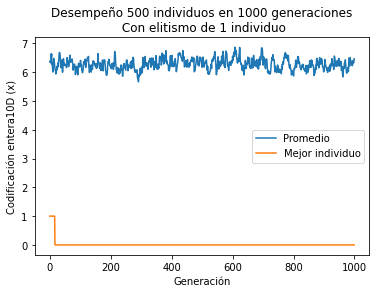

In [ ]:
minimizar(pobEnt, nInd, n, d, nGen, pc, pm, codifEnt, cruzaEnt, mutarEnt, 'Codificación entera')

Se encontraron 0 soluciones:
[]


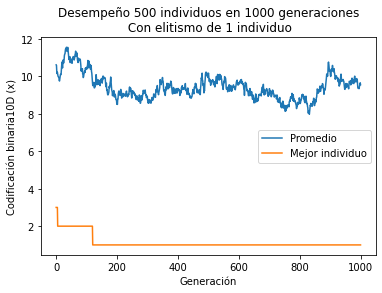

In [ ]:
minimizar(pobBin, nInd, n, d, nGen, pc, pm, codifBin, cruzaBin, mutarBin, 'Codificación binaria')

In [ ]:
nGen = 1000
nInd = 100
pc = 0.3
pm = 0.0001
n = 10
d = 5

Se encontraron 3 soluciones:
[[3 5 8 4 9 0 6 1 7 2 0]
 [5 3 8 0 2 6 9 7 1 4 0]
 [5 3 8 0 2 9 6 1 7 4 0]]


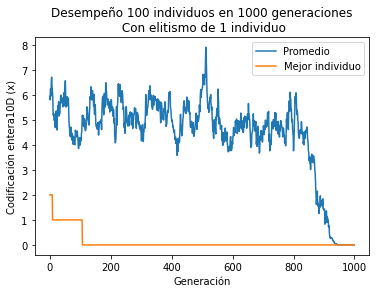

In [ ]:
minimizar(pobEnt, nInd, n, d, nGen, pc, pm, codifEnt, cruzaEnt, mutarEnt, 'Codificación entera')

Se encontraron 0 soluciones:
[]


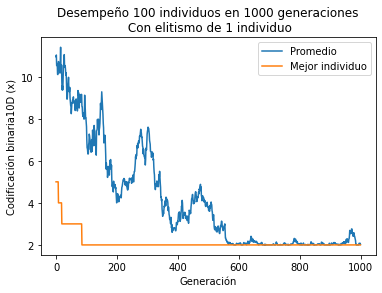

In [ ]:
minimizar(pobBin, nInd, n, d, nGen, pc, pm, codifBin, cruzaBin, mutarBin, 'Codificación binaria')

In [ ]:
nGen = 2000
pc = 0.5
pm = 1/60
nInd = 60
n = 10
d = 5

Se encontraron 522 soluciones:
[[2 4 1 ... 6 0 0]
 [2 4 1 ... 6 0 0]
 [2 4 1 ... 6 0 0]
 ...
 [2 4 1 ... 6 0 0]
 [2 4 1 ... 6 0 0]
 [2 4 1 ... 6 0 0]]


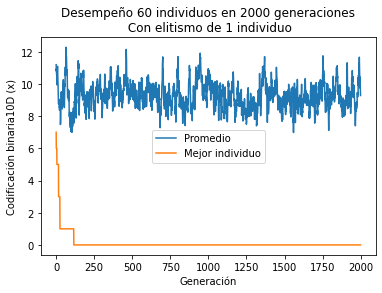

In [ ]:
minimizar(pobBin, nInd, n, d, nGen, pc, pm, codifBin, cruzaBin, mutarBin, 'Codificación binaria')

Se encontraron 11 soluciones:
[[1 4 8 3 9 7 5 2 0 6 0]
 [1 7 2 8 6 4 9 0 5 3 0]
 [3 1 7 9 6 2 5 8 0 4 0]
 [5 7 4 1 8 6 3 0 2 9 0]
 [7 4 1 3 6 9 2 8 5 0 0]
 [7 4 1 3 8 6 2 9 5 0 0]
 [7 4 1 8 6 3 0 2 5 9 0]
 [7 4 1 8 6 3 0 2 9 5 0]
 [8 1 4 2 0 9 7 5 3 6 0]
 [8 4 1 3 0 9 7 5 2 6 0]
 [8 6 4 2 0 9 7 5 3 1 0]]


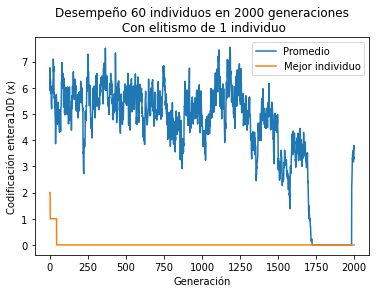

In [ ]:
minimizar(pobEnt, nInd, n, d, nGen, pc, pm, codifEnt, cruzaEnt, mutarEnt, 'Codificación entera')

## 1.3 Codificación real